In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.interpolate import make_interp_spline


In [53]:
df_r50_acc = pd.read_csv(r'./class_model/csv/model_r50_acc.csv')
df_r50_vloss = pd.read_csv(r'./class_model/csv/model_r50_vloss.csv')
df_r50_tloss = pd.read_csv(r'./class_model/csv/model_r50_loss.csv')

# resnet34 
df_r34_acc = pd.read_csv(r'./class_model/csv/model_r34_acc.csv')
df_r34_vloss = pd.read_csv(r'./class_model/csv/model_r34_vloss.csv')
df_r34_tloss = pd.read_csv(r'./class_model/csv/model_r34_loss.csv')

# vgg16
df_vgg16_acc   = pd.read_csv(r'./class_model/csv/model_vgg16_acc.csv')
df_vgg16_vloss = pd.read_csv(r'./class_model/csv/model_vgg16_vloss.csv')
df_vgg16_tloss = pd.read_csv(r'./class_model/csv/model_vgg16_loss.csv')

# mobilnet_v3_Large
df_mb_acc   = pd.read_csv(r'./class_model/csv/model_mobilenet_v3_large_acc.csv')
df_mb_vloss = pd.read_csv(r'./class_model/csv/model_mobilenet_v3_large_vloss.csv')
df_mb_tloss = pd.read_csv(r'./class_model/csv/model_mobilenet_v3_large_loss.csv')

# efficienet_b0
df_eff_acc = pd.read_csv(r'./class_model/csv/model_efficient_b0_acc.csv')
df_eff_vloss = pd.read_csv(r'./class_model/csv/model_efficient_b0_vloss.csv')
df_eff_tloss = pd.read_csv(r'./class_model/csv/model_efficient_b0_loss.csv')

In [54]:
df_r50 = pd.concat((df_r50_tloss, df_r50_vloss, df_r50_acc), axis=1)
df_r34 = pd.concat((df_r34_tloss, df_r34_vloss, df_r34_acc), axis=1)
df_vgg16 = pd.concat((df_vgg16_tloss, df_vgg16_vloss, df_vgg16_acc), axis=1)
df_mb = pd.concat((df_mb_tloss, df_mb_vloss, df_mb_acc), axis=1)
df_eff = pd.concat((df_eff_tloss,df_eff_vloss, df_eff_acc), axis=1)
df_r50.columns = ['train_loss', 'val_loss', 'accuracy']
df_eff.columns = ['train_loss', 'val_loss', 'accuracy']
df_mb.columns = ['train_loss', 'val_loss', 'accuracy']
df_r34.columns = ['train_loss', 'val_loss', 'accuracy']
df_vgg16.columns = ['train_loss', 'val_loss', 'accuracy']

C:\Users\16477\AppData\Local\Temp\ipykernel_47304\2922575664.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.cm.get_cmap()


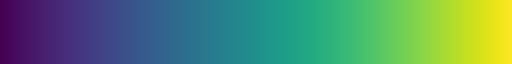

In [4]:
plt.cm.get_cmap()

Text(0, 1.78, 'B')

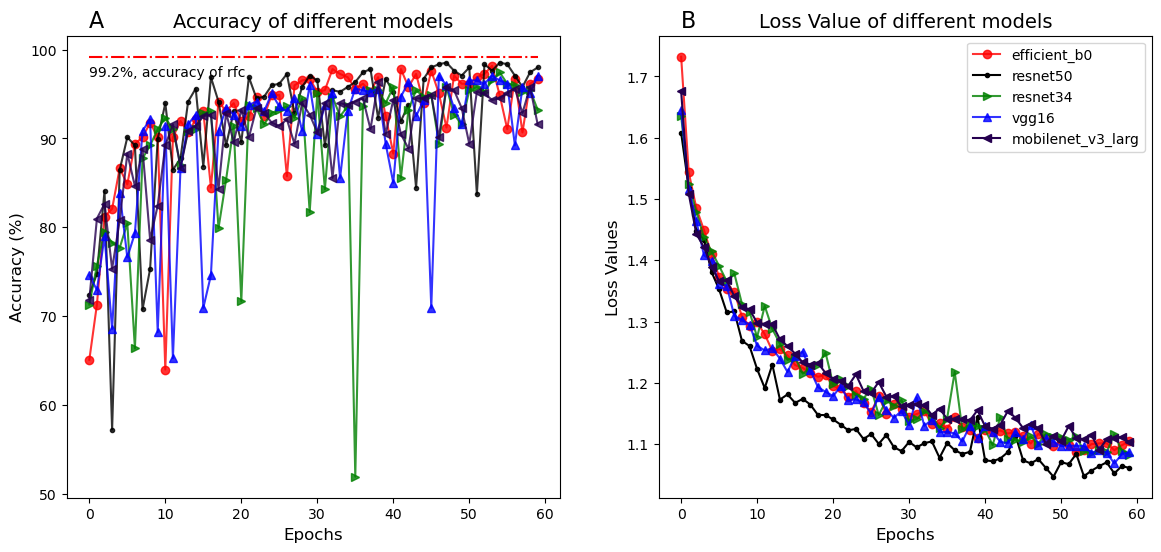

In [71]:
x = np.arange(df_eff.shape[0])
fig, axes = plt.subplots(1,2, figsize =(14,6), gridspec_kw={'hspace': 0}, dpi=100)
plt.set_cmap(cmap = 'coolwarm')
axes[0].plot(x, df_eff['accuracy'], marker = 'o', color = 'r', alpha = 0.8, label = 'efficient_b0')
axes[0].plot(x , df_r50['accuracy'], marker = '.', color = 'k', label = 'resnet50', alpha = 0.8)
axes[0].plot(x, df_r34['accuracy'], marker = '>', color = 'g', alpha = 0.8, label = 'resnet34')
axes[0].plot(x, df_vgg16['accuracy'], marker = '^', color = 'b', alpha = 0.8, label = 'vgg16')
axes[0].plot(x, df_mb['accuracy'], marker = '<', c = '#25004f', label = 'mobilenet_v3_larg', alpha=.8)
axes[0].plot(x, [99.2]*len(x), c='r', ls = '-.')
axes[0].text(x = 0, y = 97, s = '99.2%, accuracy of rfc', color = 'k', fontsize = 10)
axes[0].set_xlabel(xlabel='Epochs', fontsize =12)
axes[0].set_ylabel(ylabel='Accuracy (%)', fontsize = 12)
axes[0].set_title('Accuracy of different models', fontsize = 14)
axes[0].text(x = 0, y = 102.5, s = 'A', size = 16, color = 'k')
# 绘制loss曲线
axes[1].plot(x, df_eff['train_loss'], marker = 'o', color = 'r', alpha = 0.8, label = 'efficient_b0')
axes[1].plot(x , df_r50['train_loss'], marker = '.', color = 'k', label = 'resnet50')
axes[1].plot(x, df_r34['train_loss'], marker = '>', color = 'g', alpha = 0.8, label = 'resnet34')
axes[1].plot(x, df_vgg16['train_loss'], marker = '^', color = 'b', alpha = 0.8, label = 'vgg16')
axes[1].plot(x, df_mb['train_loss'], marker = '<', c = '#25004f', label = 'mobilenet_v3_larg')
axes[1].legend()
axes[1].set_title('Loss Value of different models', fontsize = 14)
axes[1].set_xlabel(xlabel='Epochs', fontsize =12)
axes[1].set_ylabel(ylabel='Loss Values', fontsize =12)
axes[1].text(x = 0, y = 1.78, s = 'B', size = 16, color = 'k')